In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu


## IP cell group (CD4/CD8) differences with response

In [44]:
cg = pd.read_csv("./IP_cell_group_abundance_by_response_3m_and_product.csv")
cg['cell_group'] = cg['cell_group'].astype('string')
cg['p'] = cg['abundance']/100
groups_keep = cg['cell_type'].unique()  
cg['cell_type'] = pd.Categorical(cg['cell_type'], categories=groups_keep)
print(cg.shape)
print(cg.head())

color_palette = { 'NR':'#b30000','R':'#71cceb',
                 'B_healthy':'#5d81A3', 'B_tumor':'#213A5C'}

(68, 11)
  patient_alias cell_type    n  n_patient_alias  abundance sample_id  \
0        GIL_01       CD4  159              348     45.690    GIL_01   
1        GIL_01       CD8  189              348     54.310    GIL_01   
2        GIL_05       CD4   69              110     62.727    GIL_05   
3        GIL_05       CD8   41              110     37.273    GIL_05   
4        GIL_07       CD4  775             1107     70.009    GIL_07   

  response_3m Product library cell_group        p  
0          NR     GIL      13        CD4  0.45690  
1          NR     GIL      13        CD8  0.54310  
2          NR     GIL      12        CD4  0.62727  
3          NR     GIL      12        CD8  0.37273  
4           R     GIL      3b        CD4  0.70009  


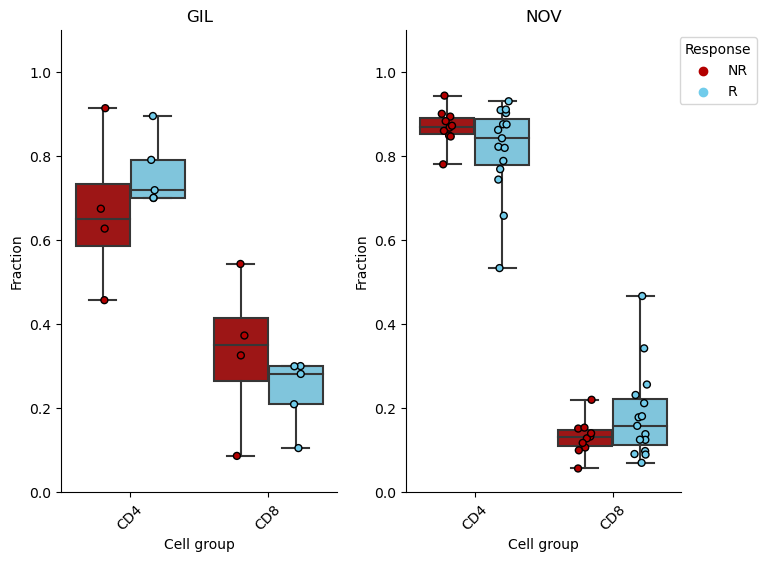

In [21]:
f,ax = plt.subplots(1,2,figsize=(8,6))

i=0
for Product in ['GIL','NOV']:
    
    group_frac = cg.loc[cg["Product"]==Product,:]

    ax[i] = sns.boxplot(x="cell_group",y="p",hue="response_3m",data=group_frac,whis=100,palette=palette,ax=ax[i])
    sns.stripplot(x="cell_group",y="p",hue="response_3m",
                      data=group_frac, dodge=True, ax=ax[i], linewidth=1, jitter=True, edgecolor='k', palette=palette)

    ax[i].set_title(f'{Product}')
    ax[i].set_xlabel('Cell group')
    ax[i].set_ylabel('Fraction')

    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 45)
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles[2:], labels[2:], title='Response', bbox_to_anchor=(1, 1.2), loc='best')
    
    y = 1
    ax[i].set_ylim([0, y])
    i+=1
     
for axi in ax:
    axi.set_ylim([0,y+0.1])
    axi.grid(False)
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)
    axi.get_legend().remove()
 
handles, labels = axi.get_legend_handles_labels()
axi.legend(handles[2:], labels[2:], title='Response', bbox_to_anchor=(1.3, 1), loc='upper right')
  
plt.subplots_adjust(wspace=0.25, hspace=0.25)
    

### CD4/CD8 ratio in infusion product

In [22]:
df = cg.pivot(index='patient_alias', columns="cell_type", values="p").reset_index()
df['CD4_CD8_ratio'] = df['CD4']/df['CD8']
print(df.shape)
tmp = cg.loc[cg['cell_type']=="CD4", ['patient_alias','response_3m','Product']]
df = df.merge(tmp, how="left")
df["Product"] = df["Product"].map({"GIL":"Axi-CEL","NOV":"Tis-CEL"})
print(df.head())
print(df.shape)

(34, 4)
  patient_alias      CD4      CD8  CD4_CD8_ratio response_3m  Product
0        GIL_01  0.45690  0.54310       0.841282          NR  Axi-CEL
1        GIL_05  0.62727  0.37273       1.682907          NR  Axi-CEL
2        GIL_07  0.70009  0.29991       2.334334           R  Axi-CEL
3        GIL_13  0.71875  0.28125       2.555556           R  Axi-CEL
4        GIL_14  0.89529  0.10471       8.550186           R  Axi-CEL
(34, 6)


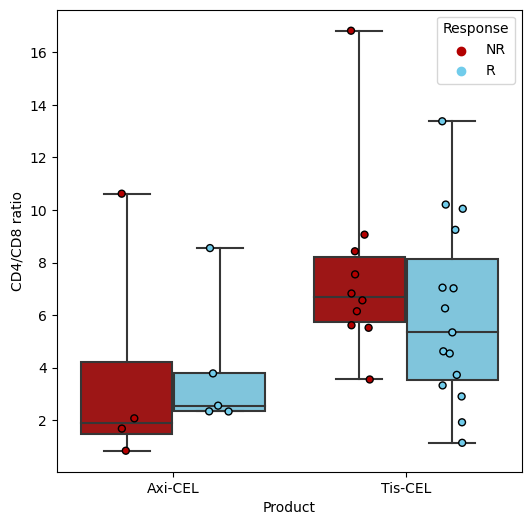

In [23]:
f,ax = plt.subplots(1,figsize=(6,6))

ax = sns.boxplot(x="Product",y="CD4_CD8_ratio",hue="response_3m",data=df,whis=100,palette=palette,ax=ax)
sns.stripplot(x="Product",y="CD4_CD8_ratio",hue="response_3m",
                data=df,dodge=True,ax=ax,linewidth=1,jitter=True,edgecolor='k', palette=palette)

#ax.set_title(f'{CD4/CD8 ratio}')
ax.set_xlabel('Product')
ax.set_ylabel('CD4/CD8 ratio')

ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[2:], labels[2:], title='Response',  loc='best')

  
plt.subplots_adjust(wspace=0.25, hspace=0.25)
    

In [24]:
axi_ratio_R = df.loc[(df['Product']=="Axi-CEL") & (df['response_3m']=="R"), "CD4_CD8_ratio"]
axi_ratio_NR = df.loc[(df['Product']=="Axi-CEL") & (df['response_3m']=="NR"), "CD4_CD8_ratio"]
tis_ratio_R = df.loc[(df['Product']=="Tis-CEL") & (df['response_3m']=="R"), "CD4_CD8_ratio"]
tis_ratio_NR = df.loc[(df['Product']=="Tis-CEL") & (df['response_3m']=="NR"), "CD4_CD8_ratio"]

print("Axi-cel:", mannwhitneyu(axi_ratio_R, axi_ratio_NR))
print("Tis-cel:", mannwhitneyu(tis_ratio_R, tis_ratio_NR))

Axi-cel: MannwhitneyuResult(statistic=15.0, pvalue=0.2857142857142857)
Tis-cel: MannwhitneyuResult(statistic=56.0, pvalue=0.30479950663380107)


### Figure 1

In [25]:
cc = pd.read_csv("./apheresis_cell_type_abundance_by_sample.csv")
cc.head()
cc = cc.drop(columns=['Product','response_3m'], axis=2)
cc['cell_group'] = cc['cell_group'].astype('string')
cc['p'] = cc['abundance']/100
groups_keep = cc['cell_type'].unique()  
cc['cell_type'] = pd.Categorical(cc['cell_type'], categories=groups_keep)
print(cc.shape)


(147, 9)


In [26]:
response_duration = pd.read_csv("./sample_response_duration.csv")
print(response_duration.shape)
print(response_duration.columns.intersection(cc.columns))
cc_duration = pd.merge(cc, response_duration, how="left")
print(cc_duration.shape)
cc_duration.head()

(44, 13)
Index(['sample_id'], dtype='object')
(147, 21)


,patient_alias,cell_type,n,n_patient_alias,abundance,sample_id,library,cell_group,p,Product,...,n_days_to_event,n_months_to_event,PETCT_prior_to_CART,clinical_response_1m,response_binary,Relapse_progression,last_event,response_3m,response_duration,response_category
0,GIL_01,CD8.naive,19,348,5.460,GIL_01,13,CD8,0.05460,GIL,...,37,1.233333,PR,NR,NR,NR,NaN,NR,short,NR
1,GIL_01,CD8.effector,158,348,45.402,GIL_01,13,CD8,0.45402,GIL,...,37,1.233333,PR,NR,NR,NR,NaN,NR,short,NR
2,GIL_01,CD8.cycling,12,348,3.448,GIL_01,13,CD8,0.03448,GIL,...,37,1.233333,PR,NR,NR,NR,NaN,NR,short,NR
3,GIL_01,CD4.naive,18,348,5.172,GIL_01,13,CD4,0.05172,GIL,...,37,1.233333,PR,NR,NR,NR,NaN,NR,short,NR
4,GIL_01,CD4.effector,44,348,12.644,GIL_01,13,CD4,0.12644,GIL,...,37,1.233333,PR,NR,NR,NR,NaN,NR,short,NR


In [27]:
## B cell categories
def set_B_category(id, response):
    patients_predicted_healthyB = [ "GIL_08", "GIL_10", "GIL_13", "NOV_10","NOV_11", "NOV_14", "NOV_16" ]
    patients_predicted_tumorB = [ "NOV_06", "NOV_15", "NOV_20", "NOV_22", "NOV_25" ]
    if (id in patients_predicted_healthyB):
        return('B_healthy')
    elif (id in patients_predicted_tumorB):    
        return('B_tumor')
    else:
        return(response)
    
cc_duration['B_response_3m'] = [set_B_category(row['sample_id'], row['response_3m']) for index, row in cc_duration.iterrows()]        
cc_duration['B_response_3m'] = pd.Categorical(cc_duration['B_response_3m'], categories=['NR','R','B_healthy','B_tumor'])


In [28]:
IP_dir

'/home/labs/amit/weitan/projects/yonatan/IP/out/seurat/CAR-T_V4/'

In [29]:
## response df
df_response = cc_duration.loc[cc_duration['response_3m'].isin(['NR','R']),:]
df_response['cell_type'] = df_response['cell_type'].astype(str)
df_response['Product'].value_counts()

## group stats
group_stats_dict = {'NOV_response_3m': "./apheresis_cell_type_abundance_by_response_3m.NOV.stats.sccomp.csv",
                    'GIL_response_3m': "./apheresis_cell_type_abundance_by_response_3m.GIL.stats.sccomp.csv"}

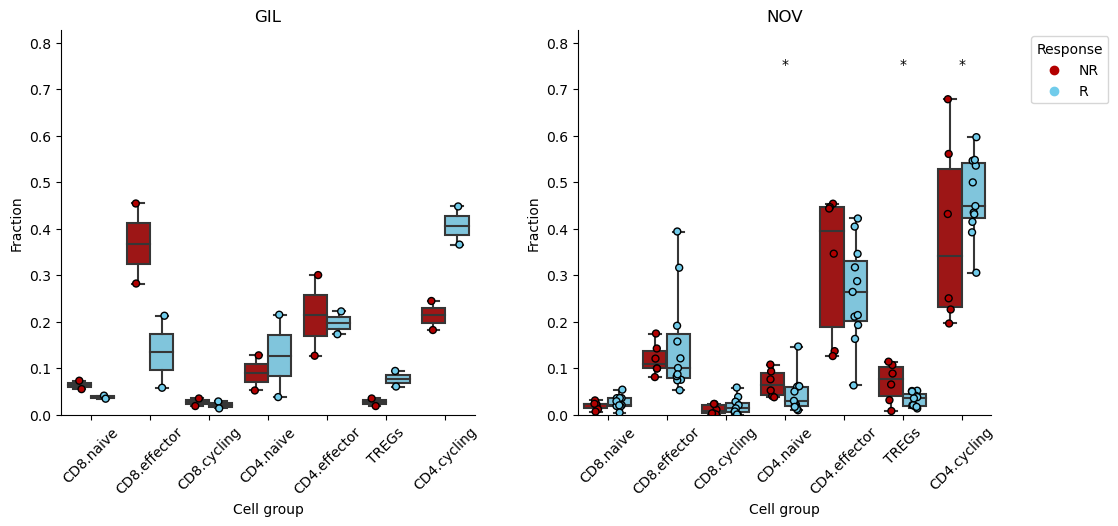

In [30]:
f,ax = plt.subplots(1,2,figsize=(12,5))

i=0
for Product in ['GIL','NOV']:
    
    group_frac = df_response.loc[df_response["Product"]==Product,:]
    
    if Product == "NOV":
        group_stats = pd.read_csv(group_stats_dict['NOV_response_3m'])
    elif Product == "GIL":
        group_stats = pd.read_csv(group_stats_dict['GIL_response_3m'])

    stat_frac = group_stats.loc[group_stats['factor'].notna(),:]
    
    ax[i] = sns.boxplot(x="cell_type",y="p",hue="response_3m",data=group_frac,whis=100,palette=palette,ax=ax[i])
    
    sns.stripplot(x="cell_type",y="p",hue="response_3m",
                      data=group_frac,dodge=True,ax=ax[i],linewidth=1,jitter=True,edgecolor='k', palette=palette)

    ax[i].set_title(f'{Product}')
    ax[i].set_xlabel('Cell group')
    ax[i].set_ylabel('Fraction')

    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 45)
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles[2:], labels[2:], title='Response', bbox_to_anchor=(1, 1.2), loc='best')
    
    ## add p-values where significant
    y = max(df_response['p']) + 0.05
    ax[i].set_ylim([0, y])
    for ig, group in enumerate(groups_keep):
        x1 = ig-0.25
        x2 = ig+0.25
        #pval = stat_frac.loc[stat_frac['cell_type']==group,'pvalue'].values[0]
        pval = stat_frac.loc[stat_frac['cell_type']==group,'c_FDR'].values[0]
        pval_s = "*" if pval < 0.05 else ""
        #pval_s = "p={:.2}".format(pval)
        h, col = 0.01, 'k'
        #ax[i].plot([x1, x2], [y, y], lw=1.5, c=col)
        ax[i].text((x1+x2)*.5, y+h, pval_s, ha='center', va='bottom', color=col)
    i+=1
     
for axi in ax:
    axi.set_ylim([0,y+0.1])
    axi.grid(False)
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)
    axi.get_legend().remove()
 
handles, labels = axi.get_legend_handles_labels()
axi.legend(handles[2:], labels[2:], title='Response', bbox_to_anchor=(1.3, 1), loc='upper right')
  
plt.subplots_adjust(wspace=0.25, hspace=0.25)
    

In [51]:

def group_boxplot(name, group_df, max_group_abundance, stat_df, split_by = None, outfile = None):
    
    print('{} group'.format(name))
    
    cell_types = group_df.cell_type.unique()
    ct_len = len(cell_types)
    figsize=((ct_len * 1)+1, 6)
    plt.rcParams['figure.figsize'] = figsize
                
    ax = sns.boxplot(x="cell_type",y="abundance",hue=split_by,data=group_df,width=0.8, whis=[5,95],fliersize=0,palette=color_palette)    
    sns.stripplot(x="cell_type",y="abundance",hue=split_by,data=group_df,dodge=True,ax=ax,linewidth=1,jitter=True,edgecolor='k', palette=color_palette)
        
    ax.set_ylabel('Abundance (%) ')
    ax.get_legend().remove()
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)

    ## add p-values where significant      
    y = max_group_abundance + 5
    
    cell_types = group_df.cell_type.unique()
    if len(stat_df) > 0:
        for ig, ctype in enumerate(cell_types):
            #print(ctype)
            x1 = ig-0.25
            x2 = ig+0.25
            pval = stat_df.loc[stat_df['cell_type']==ctype,'c_FDR'].values[0]
            pval_str = "{:.2}".format(pval)
            pval_str = "*" if pval < 0.05 else ""
            h, col = 0.01, 'k'
            if pval < 0.05:
                ax.plot([x1, x2], [y, y], lw=1.5, c=col)
            ax.text((x1+x2)*.5, y+h, pval_str, ha='center', va='bottom', color=col)

            ax.set_ylim([0, y])
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.grid(False)
  
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid(False)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[2:], labels[2:], title='Response', bbox_to_anchor=(1, 0.8), loc='best')
    
    plt.show()

GIL
B_response_3m
NR           56
R            42
B_healthy    28
B_tumor      21
Name: count, dtype: int64
GIL_B_response_3m group


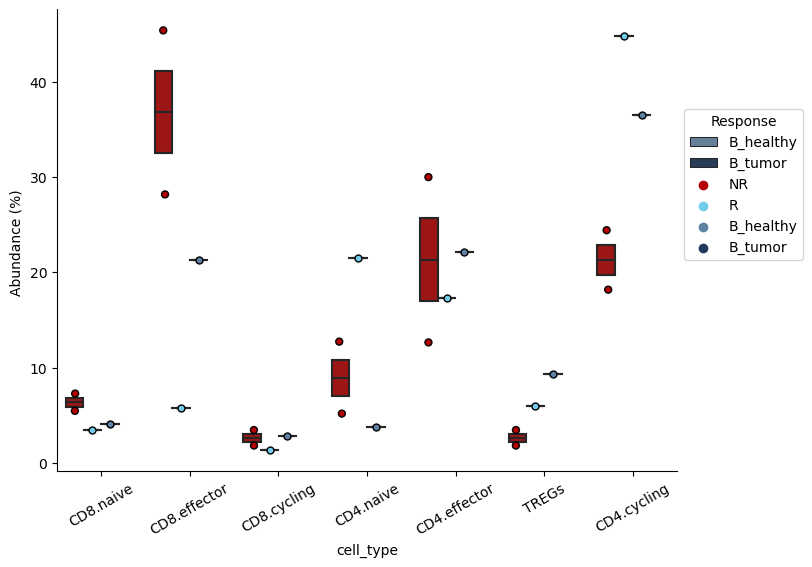

GIL_response_3m group


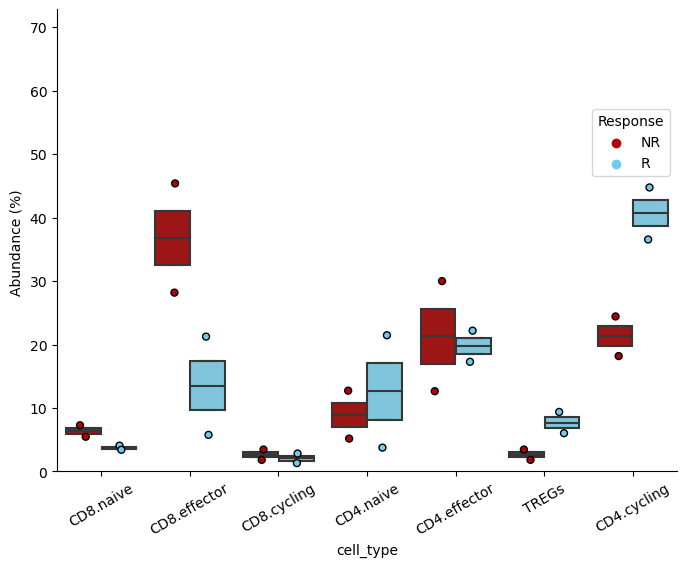

NOV
B_response_3m
NR           56
R            42
B_healthy    28
B_tumor      21
Name: count, dtype: int64
NOV_B_response_3m group


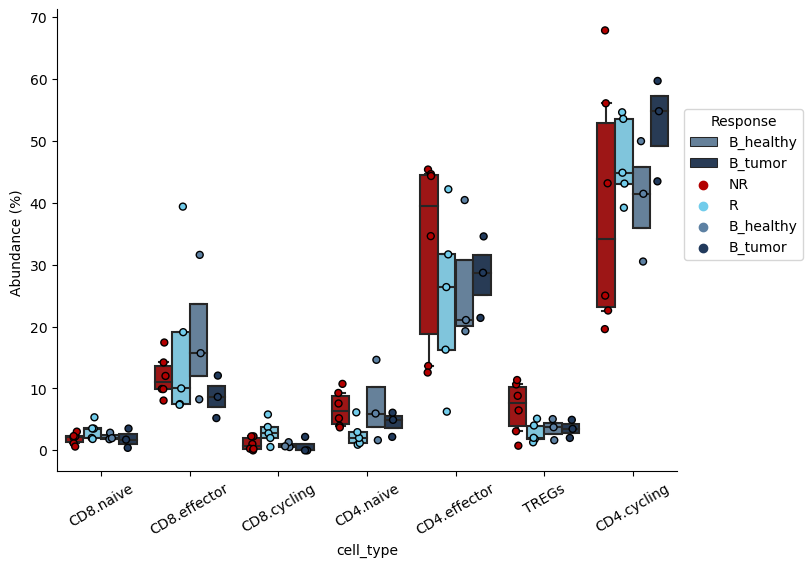

NOV_response_3m group


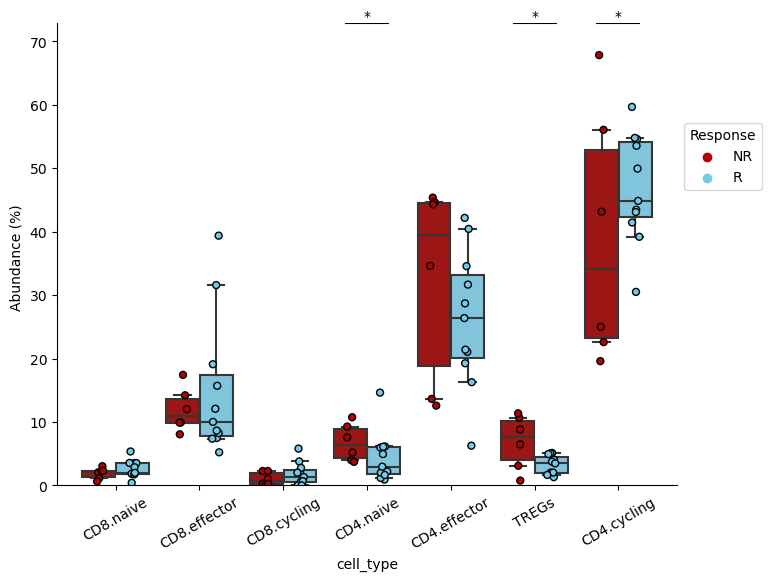

In [52]:

for product in ['GIL', 'NOV']:
    print(product)
    group_frac = df_response.loc[(df_response["Product"]==product), :]
    max_group_abundance = df_response['abundance'].max()
      
    for split_by in ["B_response_3m", "response_3m" ]:   
        name = product+"_"+split_by
        if name in group_stats_dict:
            stat_frac = pd.read_csv(group_stats_dict[name])
            stat_frac = stat_frac.loc[(stat_frac["factor"].notna()),:]
        else:
            stat_frac = pd.DataFrame()
                
        if split_by == "B_response_3m":
            print(df_response['B_response_3m'].value_counts())
            
        group_boxplot(name, group_frac, max_group_abundance,  stat_df = stat_frac, split_by=split_by)
    
    
    